<!--NAVIGATION-->

<a href="https://colab.research.google.com/github/bpesquet/machine-learning-katas/blob/master/classic-datasets/Breast_Cancer.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Breast Cancer Dataset

| Learning type | Activity type | Objective |
| - | - | - |
| Supervised | Binary classification | Predict if a tumor is benign or malignant |


## About the dataset

The [Breast Cancer][1] dataset is used for multivariate binary classification. There are 569 total samples with 30 features each. Features were computed from a digitized image of a fine needle aspirate of a breast mass. They describe characteristics of the cell nuclei present in the image.

![](images/breast-cancer-logo.jpg)

[1]: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## Package setup

In [19]:
#DO THE NECESSARY IMPORTS
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
# Display plots inline, change default figure size and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

## Step 1: Loading the data
**EXERCISE: In a similar was as you did with iris and wine ;).**

In [3]:
dataset = load_breast_cancer()

In [7]:
# Put data in a pandas DataFrame
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)


In [12]:
# Add target and class to DataFrame
df['target'] = dataset.target
df['class'] = dataset.target_names[dataset.target]

Since the original labels are in 0,1 format, we could change the labels to benign and malignant using .replace function. Using inplace=True will modify the dataframe breast_dataset.
**Optional**

In [5]:
#df_breast['target'].replace(0, 'Malignant',inplace=True)
#df_breast['target'].replace(1, 'Benign',inplace=True)
#if we do this we should also drop the class
#df=df.drop("class")
#df_breast.head()

## Visualizing the Breast Cancer data

### Select your X and y's

In [16]:
# YOUR CODE HERE
X = df.iloc[:,:-2]
y = df['target']

### Step 2: Normalize the data in X

In [18]:
#do the necessary imports (you can also do them all above)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Optional

Convert this to a pandas dataframe again in order to visualize it. 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Short exercise
Let's check whether the normalized data has a mean of zero and a standard deviation of one. **Those are indicators of proper normalization**

In [20]:
np.mean(X_scaled),np.std(X_scaled)

(-6.118909323768877e-16, 1.0)

## Apply the PCA Method

In [21]:
#do the necessary imports
from sklearn.decomposition import PCA

In [39]:
pca = PCA(2)
pca.fit(X_scaled)
df_principal_breast = pd.DataFrame(pca.transform(X_scaled))



Next, let's create a **new DataFrame** that will have the principal component values for all the samples.

In [48]:
pca = PCA(2)
pca.fit(X_scaled)
df_principal_breast = pd.DataFrame(pca.transform(X_scaled),columns = ['principal component 1','principal component 2'])

Once you have the principal components, you can find the **explained_variance_ratio**. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [44]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


From the above output, you can observe that the principal component 1 holds **44.2%** of the information while the principal component 2 holds only **19%** of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

## Plotting the visualization

<Figure size 432x288 with 0 Axes>

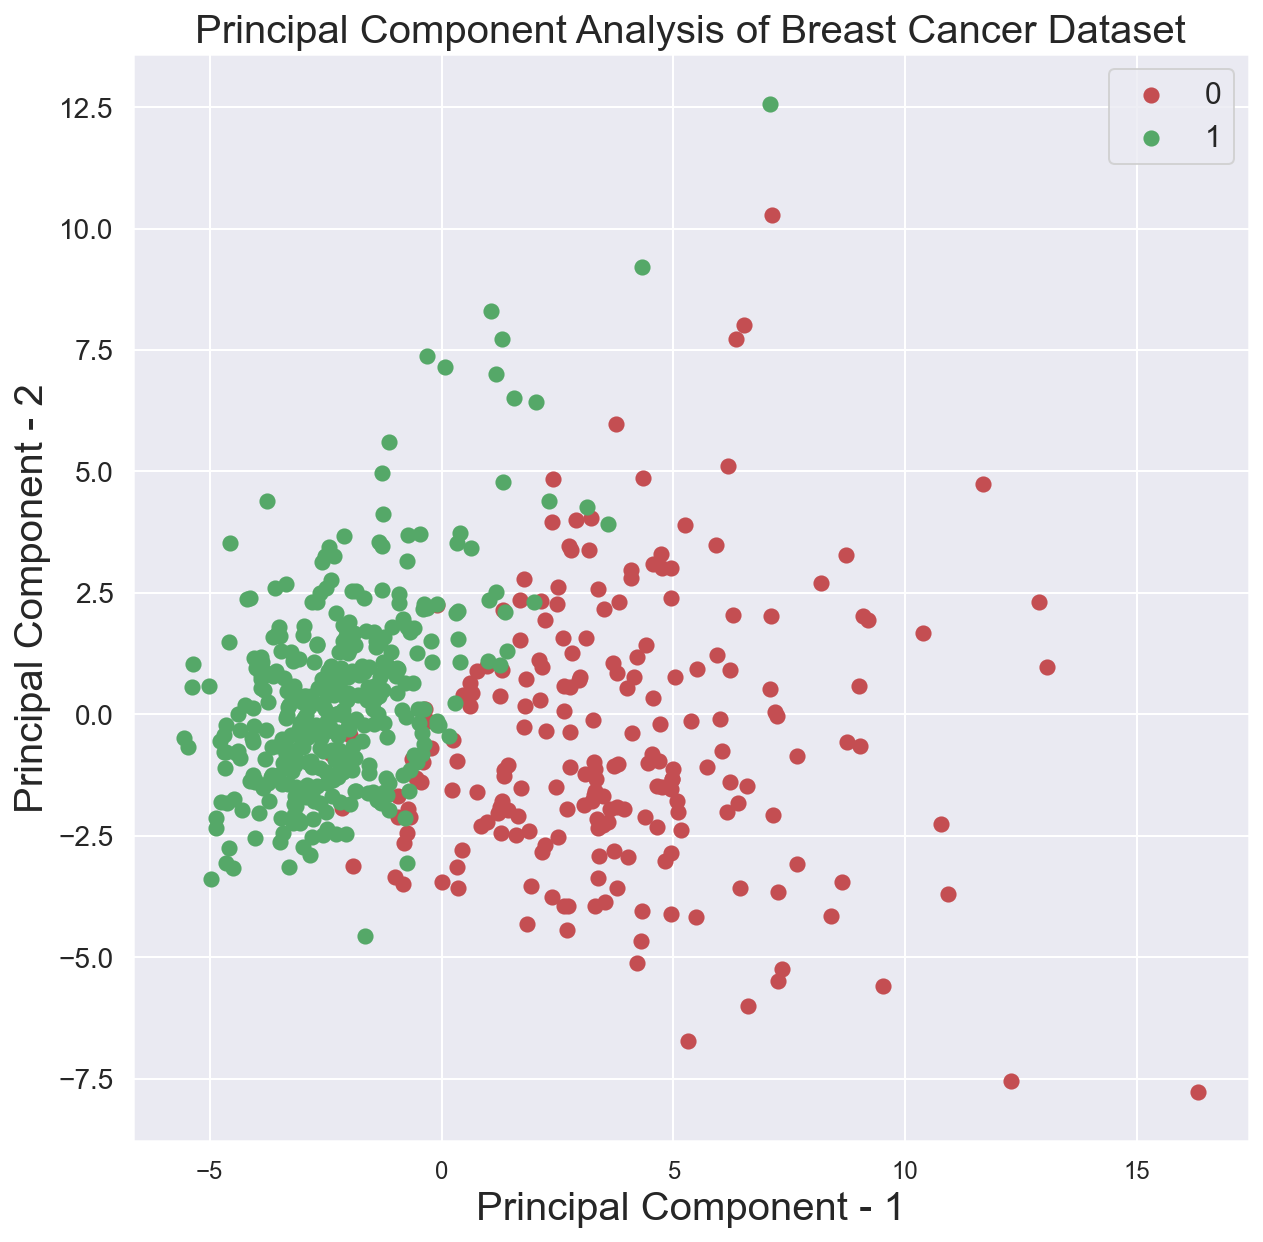

In [58]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    plt.scatter(df_principal_breast.loc[indicesToKeep, 'principal component 1']
               , df_principal_breast.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


### Additional Challenge: Can you fix the labels in the plot so they are the original classes? 
Benign and Malign instead of 1 and 0

<Figure size 432x288 with 0 Axes>

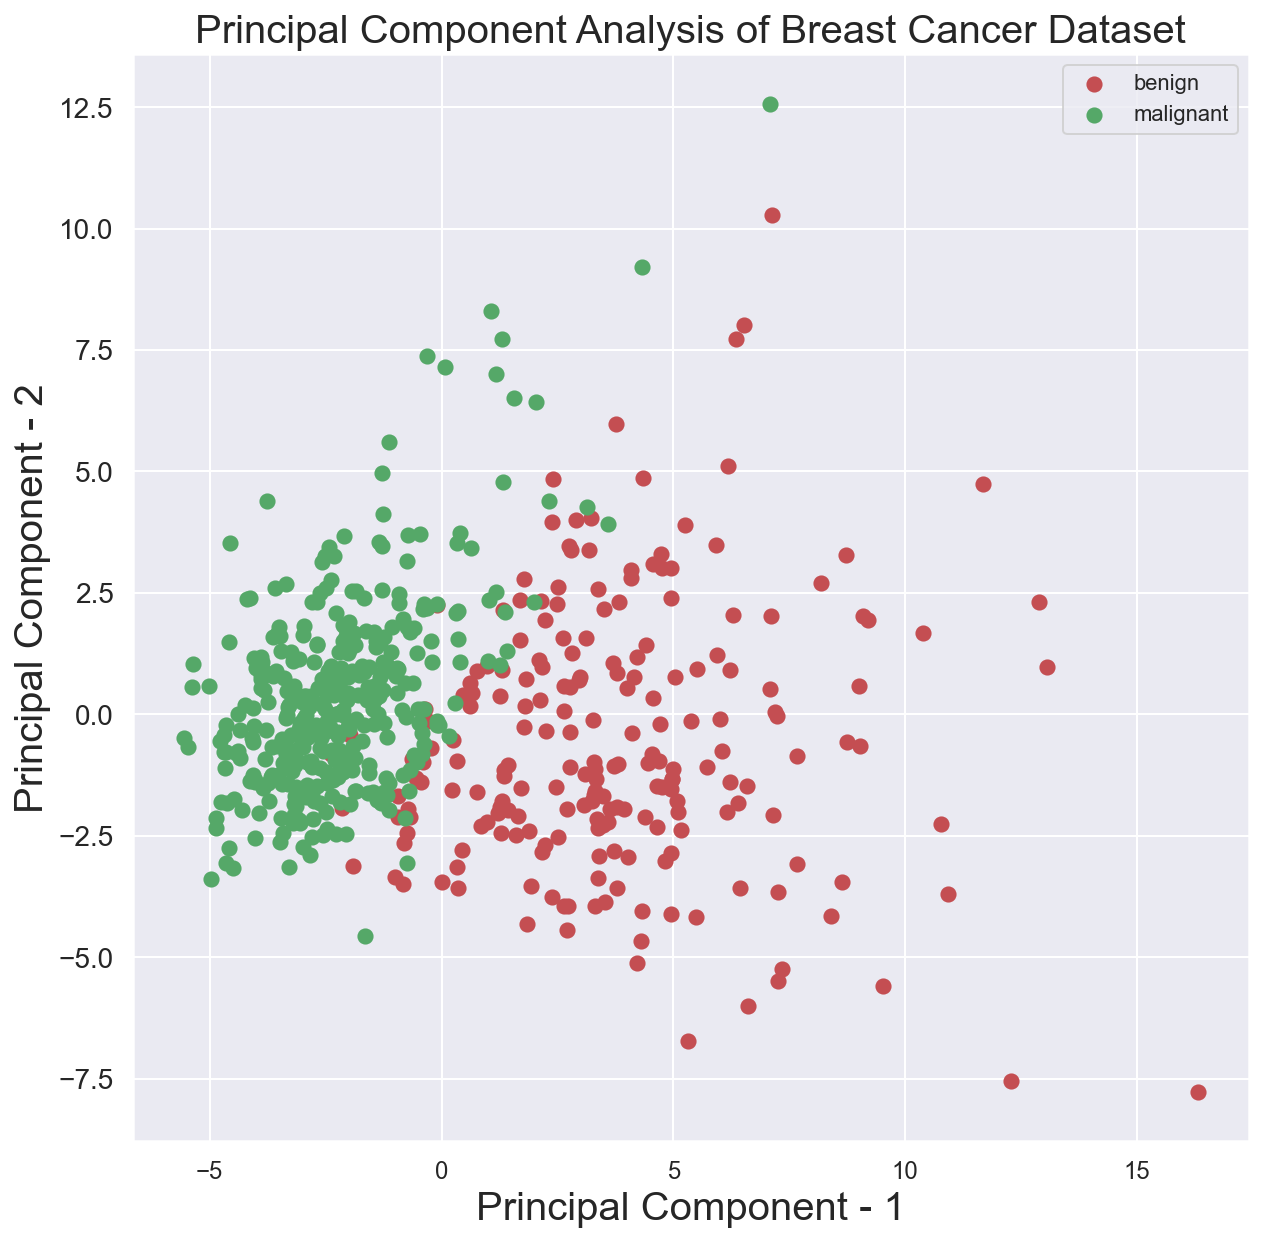

In [59]:

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    plt.scatter(df_principal_breast.loc[indicesToKeep, 'principal component 1']
               , df_principal_breast.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.legend(['benign','malignant'])
